# K-Means Clustering Algorithm on the Iris Dataset 

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

## Reading and Analyzing the Dataset

In [2]:
df = pd.read_csv('dataset/iris.csv')

In [3]:
df.shape

(150, 6)

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Segregating Columns for Clustering

In [7]:
x = df.iloc[:, 1:-1].values

In [8]:
x.shape

(150, 4)

## Finding the Optimum Number of Clusters (k) Using The Elbow Method

### Method 1: Manually calculating the "Within Cluster Sum of Squares" (WCSS) for different k-values

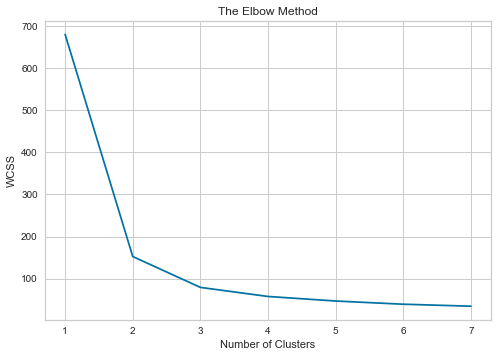

In [9]:
wcss = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 8), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("The Elbow Method")
plt.show()

### Method 2: Using KElbowVisualizer from the Yellowbrick library

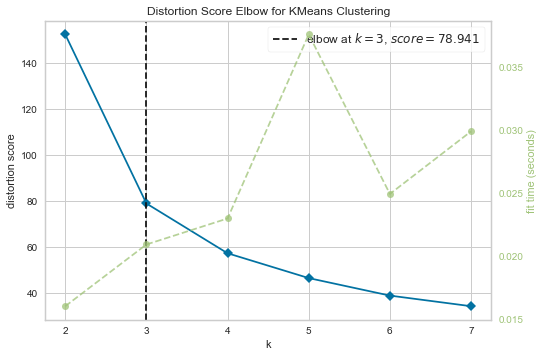

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=7, metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(x)
visualizer.show()

Both methods seem to indicate the optimal value of k is 3.

## Running the K-Means Clustering Algorithm

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', tol=1e-5, random_state=0)
y_kmeans = kmeans.fit_predict(x)

In [12]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## Visualizing the Clusters

<Figure size 576x432 with 0 Axes>

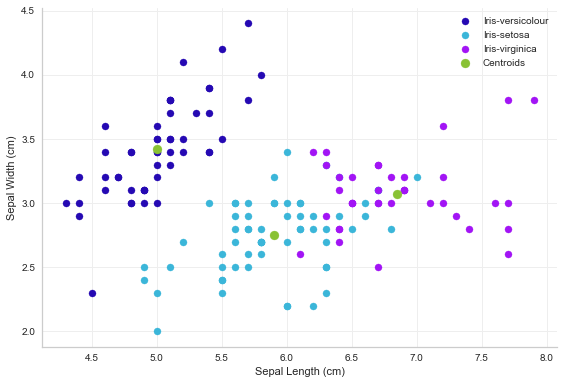

In [13]:
plt.figure(figsize=(8,6))
fig, ax = plt.subplots()
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = '#2509b3', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = '#3bb6d9', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = '#a214f5', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 80, c = '#89c234', label = 'Centroids')

plt.legend()

ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.grid(True, color='#eee')
ax.yaxis.grid(True, color='#eee')

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.tight_layout()
plt.show()

In [14]:
import plotly.express as px

In [15]:
plot_df = df[df.columns[1:-1]].copy()
plot_df['Species'] = y_kmeans
plot_df['Species'] = plot_df['Species'].replace({0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'})

In [16]:
plot_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-versicolor
1,4.9,3.0,1.4,0.2,Iris-versicolor
2,4.7,3.2,1.3,0.2,Iris-versicolor
3,4.6,3.1,1.5,0.2,Iris-versicolor
4,5.0,3.6,1.4,0.2,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-setosa
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
colors = ['#2509b3', '#3bb6d9', '#a214f5']
cols = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
fig = px.scatter_matrix(data_frame=plot_df, dimensions=cols, color="Species", color_discrete_sequence=colors, title='Cluster Characteristics')
# fig.update_traces(showupperhalf=False)
fig.update_layout(height=900, width=1600)
fig.show()